# 1. Import Necessary libraries

In [54]:
import pandas as pd

# 2. Import Dataset

In [2]:
claimants_data = pd.read_csv('claimants.csv')
claimants_data

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


# 3. Data Understanding

## 3.1 Initial Analysis

In [4]:
claimants_data.shape

(1340, 7)

In [5]:
claimants_data.isna().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [6]:
claimants_data.dtypes

CASENUM       int64
ATTORNEY      int64
CLMSEX      float64
CLMINSUR    float64
SEATBELT    float64
CLMAGE      float64
LOSS        float64
dtype: object

# 4. Data Preparation

In [3]:
del claimants_data['CASENUM']

In [8]:
claimants_data.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [4]:
claimants_data.dropna(axis=0,inplace=True)

In [10]:
claimants_data.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [11]:
claimants_data.shape

(1096, 6)

In [12]:
1340-1096

244

In [13]:
claimants_data.head(30)

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
5,0,1.0,1.0,0.0,35.0,0.309
6,0,0.0,1.0,0.0,9.0,3.538
7,0,1.0,1.0,0.0,34.0,4.881
8,1,1.0,1.0,0.0,60.0,0.874
10,0,1.0,1.0,0.0,37.0,6.190


# 5. Model Building

### 2 Step process:

1. Separate Input and Output
2. Perform some **Model Validation Techniques:**
    * Train-Test Split
    * K-Fold Cross Validation
    * Leave One Out Cross Validation

In [5]:
X = claimants_data.drop('ATTORNEY',axis =1)
y = claimants_data[['ATTORNEY']]

In [6]:
X.shape,y.shape

((1096, 5), (1096, 1))

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123,shuffle=True)

In [27]:
X_train.shape,y_train.shape #Training samples

((876, 5), (876, 1))

In [29]:
X_test.shape,y_test.shape #Test samples

((220, 5), (220, 1))

# 6. Model Training

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [132]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(class_weight={0:1,1:2})

from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='gini',max_depth = 3)

In [144]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = dt_model,
                           param_grid = {'criterion':['gini','entropy'],
                                         'max_depth':[3,4,5,6,7,8,9]},
                           cv = 5)
grid_search.fit(X,y)

grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [133]:
%%time
dt_model.fit(X_train,y_train)
#dt_model.fit(X_train,y_train)

Wall time: 8.09 ms


DecisionTreeClassifier(max_depth=3)

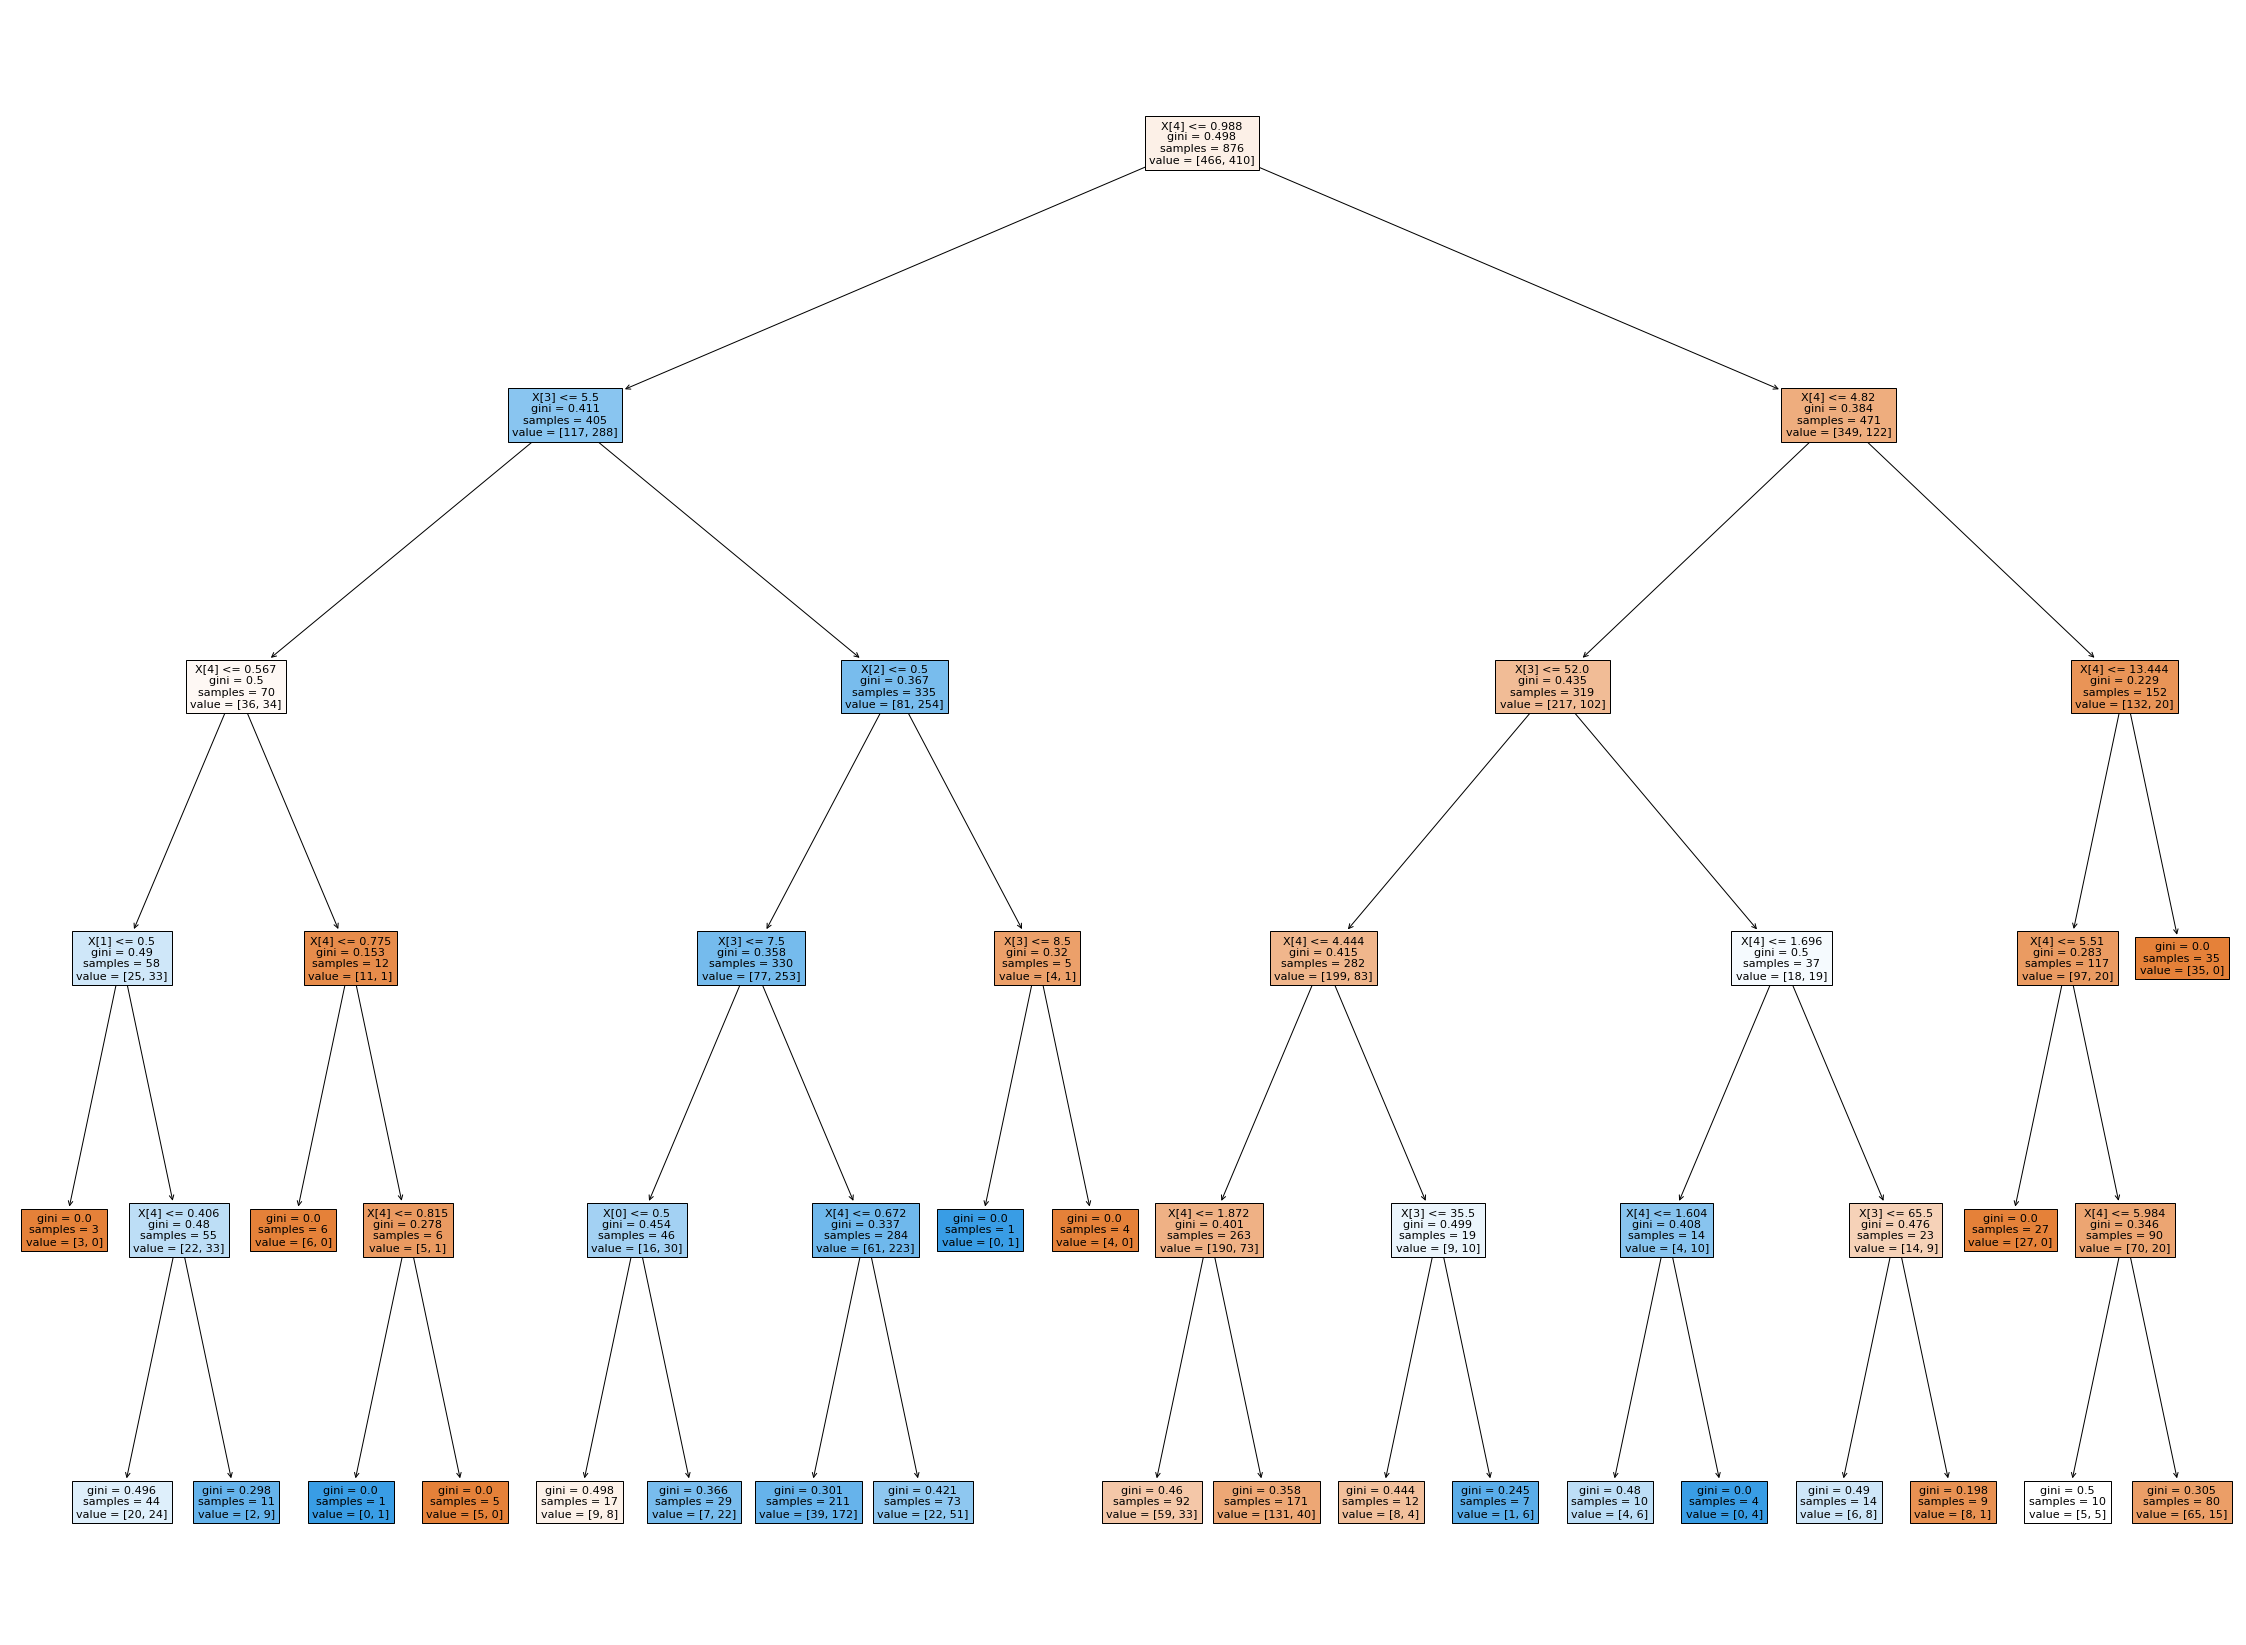

In [82]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(40,30))
plot_tree(decision_tree = dt_model,filled=True,proportion=False)

plt.show()

In [79]:
logistic_model.coef_

array([[ 0.19573154,  0.16837949, -0.1384335 ,  0.18505522, -3.59311548]])

In [80]:
logistic_model.intercept_

array([-0.63961026])

# 7. Model Testing || 8. Model Evaluation

### Training Accuracy

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [134]:
y_pred_train = dt_model.predict(X_train)

In [135]:
accuracy_score(y_train,y_pred_train)

0.7431506849315068

In [136]:
confusion_matrix(y_train,y_pred_train)

array([[346, 120],
       [105, 305]], dtype=int64)

In [137]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       466
           1       0.72      0.74      0.73       410

    accuracy                           0.74       876
   macro avg       0.74      0.74      0.74       876
weighted avg       0.74      0.74      0.74       876



In [34]:
roc_curve(y, logistic_model.predict_proba (X)[:,1])

(array([0.        , 0.        , 0.        , 0.0017301 , 0.0017301 ,
        0.00346021, 0.00346021, 0.00692042, 0.00692042, 0.01038062,
        0.01038062, 0.01211073, 0.01211073, 0.01384083, 0.01384083,
        0.01557093, 0.01557093, 0.01730104, 0.01730104, 0.01903114,
        0.01903114, 0.02249135, 0.02249135, 0.02422145, 0.02422145,
        0.02595156, 0.02595156, 0.02941176, 0.02941176, 0.03114187,
        0.03114187, 0.03460208, 0.03460208, 0.03460208, 0.03460208,
        0.03633218, 0.03633218, 0.03806228, 0.03806228, 0.04152249,
        0.04152249, 0.0432526 , 0.0432526 , 0.0449827 , 0.0449827 ,
        0.0467128 , 0.0467128 , 0.04844291, 0.04844291, 0.05363322,
        0.05363322, 0.05536332, 0.05536332, 0.05709343, 0.05709343,
        0.05882353, 0.06228374, 0.06401384, 0.06401384, 0.06574394,
        0.06747405, 0.06920415, 0.06920415, 0.07093426, 0.07093426,
        0.07266436, 0.07266436, 0.07439446, 0.07439446, 0.07785467,
        0.07958478, 0.07958478, 0.08131488, 0.08

0.785774102376217


Text(0, 0.5, 'True Positive Rate')

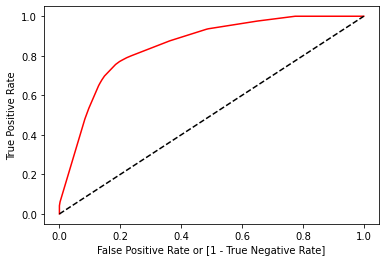

In [123]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y_train, dt_model.predict_proba (X_train)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### Test Accuracy

In [138]:
y_pred_test = dt_model.predict(X_test)

In [139]:
accuracy_score(y_test,y_pred_test)

0.7

In [140]:
confusion_matrix(y_test,y_pred_test)

array([[83, 29],
       [37, 71]], dtype=int64)

In [141]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.69      0.74      0.72       112
           1       0.71      0.66      0.68       108

    accuracy                           0.70       220
   macro avg       0.70      0.70      0.70       220
weighted avg       0.70      0.70      0.70       220



0.699239417989418


Text(0, 0.5, 'True Positive Rate')

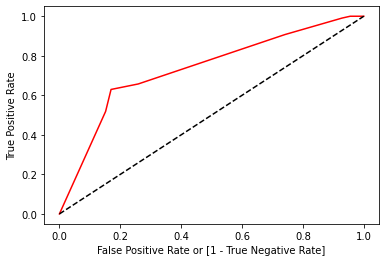

In [142]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, dt_model.predict_proba (X_test)[:,1])

auc = roc_auc_score(y_test,y_pred_test)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

# 9. Model Deployement

In [42]:
from pickle import dump

In [43]:
dump(logistic_model,open('claimants_intelligene.pkl','wb'))

In [44]:
from pickle import load

In [46]:
loaded_intelligence = load(open('claimants_intelligene.pkl','rb'))

In [48]:
y_pred_deployemet = loaded_intelligence.predict(X_test)

## ========================================================================

# MODEL OPTIMIZATION TECHNIQUES

## 1. STANDARDIZE AND CHECK THE ACCURACY

In [70]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_X = std_scaler.fit_transform(X)
scaled_X

array([[-1.13916369,  0.32550512, -0.13633547,  1.05048704,  2.96924493],
       [ 0.87783697, -3.07214831, -0.13633547, -0.51942439, -0.28328699],
       [-1.13916369,  0.32550512, -0.13633547, -1.15720091, -0.33687653],
       ...,
       [ 0.87783697,  0.32550512, -0.13633547,  0.51082998, -0.35894281],
       [ 0.87783697, -3.07214831, -0.13633547, -1.01002171, -0.06491676],
       [ 0.87783697,  0.32550512, -0.13633547,  0.0692924 , -0.30267857]])

In [71]:
X_train,X_test,y_train,y_test = train_test_split(scaled_X,y,test_size=0.20,random_state=123)

In [72]:
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [73]:
%%time
y_pred_train = logistic_model.predict(X_train)

Wall time: 998 µs


In [74]:
accuracy_score(y_train,y_pred_train)

0.7180365296803652

In [75]:
y_pred_test = logistic_model.predict(X_test)
accuracy_score(y_test,y_pred_test)

0.6681818181818182

# THE END!!